<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047>Escalamiento de Variables Numéricas </font> </center>

El **escalamiento de variables numéricas** es una etapa fundamental en el preprocesamiento de datos para machine learning y análisis estadístico. Consiste en transformar los valores de las variables numéricas para que tengan una escala comparable, lo que mejora el desempeño de muchos algoritmos.

A continuación se explican las principales técnicas de escalamiento, cada una con ejemplos prácticos en Python.

## 1. Estandarización (Standardization)

La estandarización transforma los datos para que tengan media cero y desviación estándar uno. Es útil cuando los datos tienen una distribución aproximadamente normal.

La fórmula es:

$$ X_{est} = \frac{X - \mu}{\sigma} $$

donde $\mu$ es la media y $\sigma$ la desviación estándar.

In [1]:
# Ejemplo de estandarización con sklearn
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = {'A': [10, 20, 30, 40, 50], 'B': [100, 150, 200, 250, 300]}
df = pd.DataFrame(data)
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df

,A,B
0,10,100
1,20,150
2,30,200
3,40,250
4,50,300


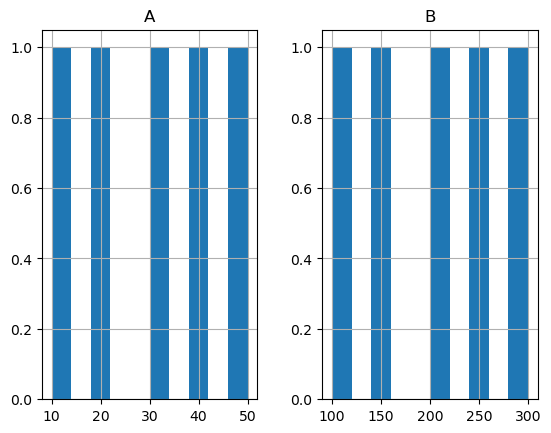

In [2]:
df.hist();

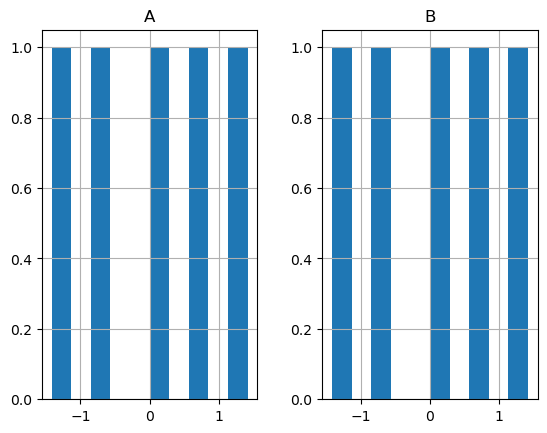

In [3]:
df_std.hist();

In [4]:
# Estandarización manual
df_manual = (df - df.mean()) / df.std()
print(df_manual)

          A         B
0 -1.264911 -1.264911
1 -0.632456 -0.632456
2  0.000000  0.000000
3  0.632456  0.632456
4  1.264911  1.264911


In [5]:
df_std

,A,B
0,-1.414214,-1.414214
1,-0.707107,-0.707107
2,0.000000,0.000000
3,0.707107,0.707107
4,1.414214,1.414214


In [6]:
#Otro ejemplo
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
df_california = pd.DataFrame(california.data, columns=california.feature_names)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_california_std = pd.DataFrame(scaler.fit_transform(df_california), columns=df_california.columns)
df_california_std.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


In [11]:
df_california

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


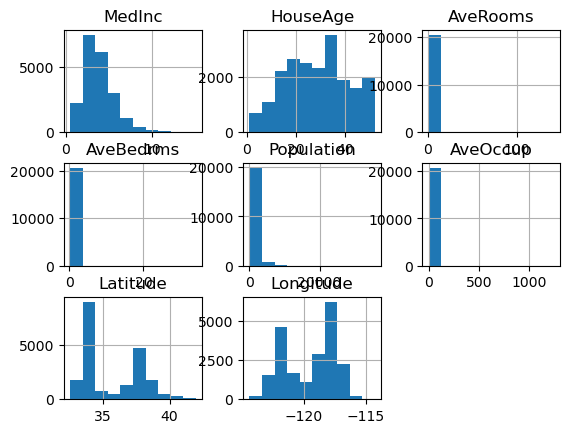

In [7]:
df_california.hist();

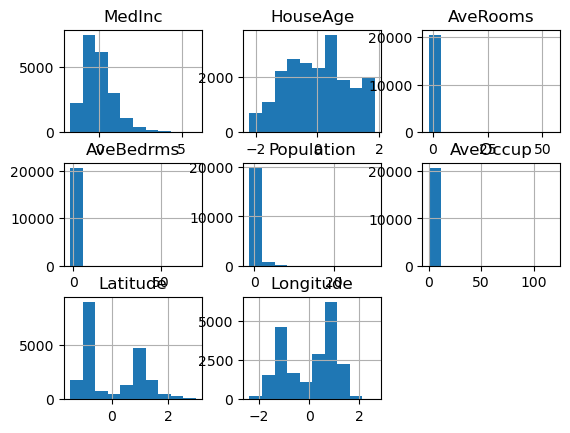

In [8]:
df_california_std.hist();

In [9]:
#Media
df_california_std.mean()

MedInc        6.609700e-17
HouseAge      5.508083e-18
AveRooms      6.609700e-17
AveBedrms    -1.060306e-16
Population   -1.101617e-17
AveOccup      3.442552e-18
Latitude     -1.079584e-15
Longitude    -8.526513e-15
dtype: float64

In [10]:
#Desviación estándar
df_california_std.std()

MedInc        1.000024
HouseAge      1.000024
AveRooms      1.000024
AveBedrms     1.000024
Population    1.000024
AveOccup      1.000024
Latitude      1.000024
Longitude     1.000024
dtype: float64

**Ventajas:**
- Útil para algoritmos que asumen datos centrados y con varianza unitaria (regresión lineal, SVM, PCA, redes neuronales).
- No está acotada a un rango específico, por lo que no distorsiona outliers.

**Desventajas:**
- No garantiza un rango fijo.
- Puede verse afectada por outliers.

se recomienda utilizar esta metodología cuando:
- Los datos tienen distribución aproximadamente normal.
- Cuando se usan algoritmos sensibles a la escala pero no al rango.


## 2. Normalización basada en la media (Mean Normalization)

Esta técnica centra los datos en torno a cero, escalando según el rango:

$$ X_{norm} = \frac{X - \mu}{X_{max} - X_{min}} $$

Es útil cuando se quiere que los datos estén entre -1 y 1 (aproximadamente).

In [12]:
# Normalización basada en la media (manual)
df_mean_norm = (df - df.mean()) / (df.max() - df.min())
print(df_mean_norm)

      A     B
0 -0.50 -0.50
1 -0.25 -0.25
2  0.00  0.00
3  0.25  0.25
4  0.50  0.50


In [13]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
df_cal = pd.DataFrame(california.data, columns=california.feature_names)
df_cal_mean_norm = (df_cal - df_cal.mean()) / (df_cal.max() - df_cal.min())
df_cal_mean_norm.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.307205,0.242363,0.011024,-0.002160,-0.030928,-0.000415,0.238910,-0.264970
1,0.305563,-0.149794,0.005736,-0.003699,0.027342,-0.000773,0.236784,-0.263974
2,0.233564,0.458049,0.020269,-0.000689,-0.026051,-0.000216,0.235721,-0.265966
3,0.122235,0.458049,0.002753,-0.000700,-0.024313,-0.000421,0.235721,-0.266962
4,-0.001688,0.458049,0.006046,-0.000462,-0.024117,-0.000716,0.235721,-0.266962


<Axes: >

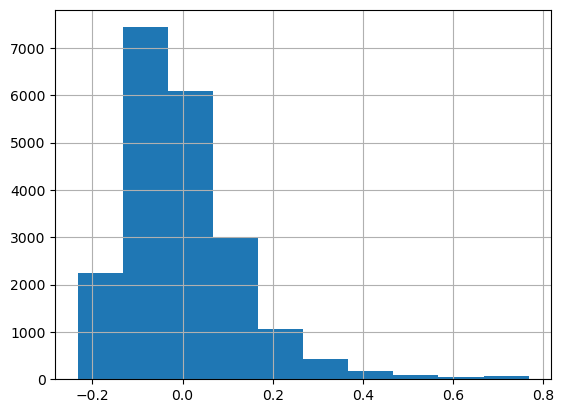

In [14]:
df_cal_mean_norm['MedInc'].hist()

**Ventajas:**
- Centra los datos en cero y los escala en función del rango.
- Útil para algoritmos que requieren datos centrados y acotados.

**Desventajas:**
- Sensible a outliers.
- Menos común en librerías estándar.

esta técnica se utliza cuand se requiere centrado y escala acotada, pero no necesariamente [0,1].


## 3. Escalamiento de valores máximo y mínimo (Min-Max Scaling)

Transforma los datos para que estén en un rango específico, típicamente [0, 1]:

$$ X_{minmax} = \frac{X - X_{min}}{X_{max} - X_{min}} $$

Es muy útil cuando se requiere que los datos estén en un rango fijo.

In [15]:
# Escalamiento Min-Max con sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_minmax = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_minmax

,A,B
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


In [16]:
# Escalamiento Min-Max manual
df_minmax_manual = (df - df.min()) / (df.max() - df.min())
df_minmax_manual

,A,B
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


In [17]:
#Otro ejemplo
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
scaler = MinMaxScaler()
df_diabetes_minmax = pd.DataFrame(scaler.fit_transform(df_diabetes), columns=df_diabetes.columns)
df_diabetes_minmax.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333


In [18]:
df_diabetes_minmax.min()

age    0.0
sex    0.0
bmi    0.0
bp     0.0
s1     0.0
s2     0.0
s3     0.0
s4     0.0
s5     0.0
s6     0.0
dtype: float64

In [19]:
df_diabetes_minmax.max()

age    1.0
sex    1.0
bmi    1.0
bp     1.0
s1     1.0
s2     1.0
s3     1.0
s4     1.0
s5     1.0
s6     1.0
dtype: float64

**Ventajas:**
- Escala los datos a un rango definido, normalmente [0,1].
- Útil para algoritmos basados en distancias (KNN, redes neuronales, clustering).

**Desventajas:**
- Muy sensible a outliers: un solo valor extremo puede distorsionar la escala.

es recomendable usar esta técnica cuando:
- Se requiere un rango fijo.
- Cuando los datos no tienen outliers significativos.


## 4. Escalamiento de máximo absoluto (MaxAbs Scaling)

Escala los datos dividiendo por el valor absoluto máximo de cada variable, útil para datos centrados en cero o con valores positivos y negativos:

$$ X_{maxabs} = \frac{X}{|X_{max}|} $$

In [20]:
# Ejemplo con valores negativos
df2 = pd.DataFrame({'A': [-1, 0, 1, 2], 'B': [-10, 0, 10, 20]})
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
df_maxabs = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)
df2

,A,B
0,-1,-10
1,0,0
2,1,10
3,2,20


In [21]:
df_maxabs

,A,B
0,-0.5,-0.5
1,0.0,0.0
2,0.5,0.5
3,1.0,1.0


In [22]:
# Escalamiento MaxAbs manual
df_maxabs_manual = df2 / df2.abs().max()
df_maxabs_manual

,A,B
0,-0.5,-0.5
1,0.0,0.0
2,0.5,0.5
3,1.0,1.0


**Ventajas:**
- Preserva la dispersión de los datos centrados en cero.
- No desplaza los datos (no centra en cero).
- Útil para datos dispersos (sparse data).

**Desventajas:**
- Sensible a valores extremos.
- No centra los datos.

Se utiliza cuando:
- Los datos ya están centrados en cero o contienen valores negativos y positivos.
- Se trabaja con datos dispersos (por ejemplo, texto vectorizado).


## 5. Escalamiento por cuantiles (Quantile Transformer)

Esta técnica transforma la distribución de los datos para que siga una distribución uniforme o normal, usando los cuantiles de los datos.

Es útil para variables con outliers o distribuciones no normales.

$$z = \frac{X - \bar{X}}{Q_3 - Q_1}$$

donde $\bar{X}$ es la mediana de $X$ y $Q_1$, $Q_3$ corresponden a los cuartiles uno y tres.

In [23]:
# Escalamiento por cuantiles a distribución uniforme
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='uniform', random_state=0)
df_quantile = pd.DataFrame(qt.fit_transform(df), columns=df.columns)
df_quantile

C:\Users\uie70742\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_data.py:2846: UserWarning: n_quantiles (1000) is greater than the total number of samples (5). n_quantiles is set to n_samples.
  warnings.warn(


,A,B
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


In [24]:
# Escalamiento por cuantiles a distribución normal
qt_norm = QuantileTransformer(output_distribution='normal', random_state=0)
df_quantile_norm = pd.DataFrame(qt_norm.fit_transform(df), columns=df.columns)
df_quantile_norm

C:\Users\uie70742\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_data.py:2846: UserWarning: n_quantiles (1000) is greater than the total number of samples (5). n_quantiles is set to n_samples.
  warnings.warn(


,A,B
0,-5.199338,-5.199338
1,-0.674490,-0.674490
2,0.000000,0.000000
3,0.674490,0.674490
4,5.199338,5.199338


In [25]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
df_cal = pd.DataFrame(california.data, columns=california.feature_names)
qt = QuantileTransformer(output_distribution='normal', random_state=0)
df_cal_quantile = pd.DataFrame(qt.fit_transform(df_cal), columns=df_cal.columns)
print(df_cal_quantile.head())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  1.926710  0.922330  1.286364  -0.362850   -1.708905 -0.469603  0.901416   
1  1.919438 -0.480839  0.799726  -1.181308    1.194649 -1.245612  0.886449   
2  1.616379  5.199338  1.939500   0.372064   -1.324830 -0.039102  0.879040   
3  1.074841  5.199338  0.477157   0.366144   -1.189522 -0.486462  0.879040   
4  0.197589  5.199338  0.830647   0.471356   -1.176936 -1.119020  0.879040   

   Longitude  
0  -1.164444  
1  -1.152175  
2  -1.184447  
3  -1.202347  
4  -1.202347  


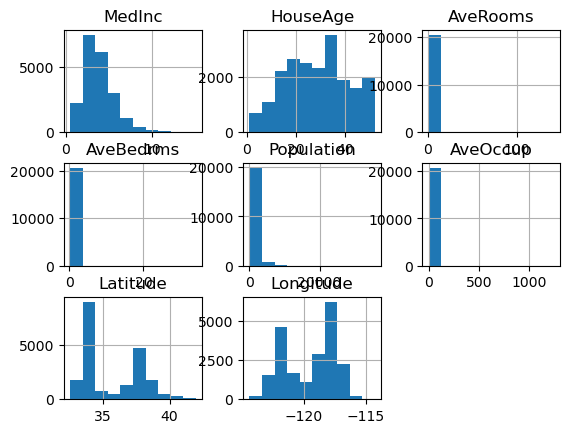

In [26]:
df_cal.hist();

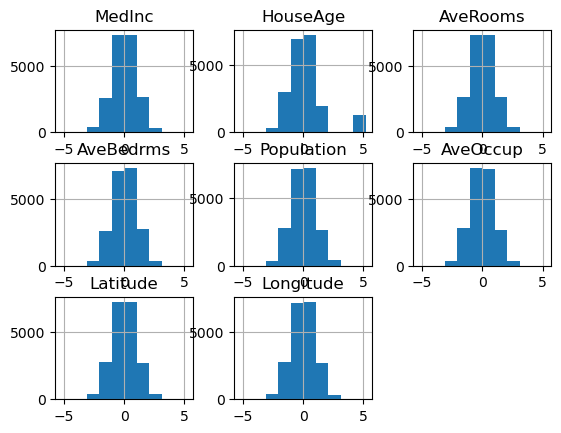

In [27]:
df_cal_quantile.hist();

**Ventajas:**
- Reduce el efecto de outliers.
- Puede transformar la distribución a uniforme o normal.
- Útil para algoritmos que asumen normalidad o para robustecer frente a valores extremos.

**Desventajas:**
- Puede distorsionar relaciones lineales entre variables.
- Más costoso computacionalmente.

Es recomendable usar escalamiento por cuantiles cuando:
- Los datos tienen outliers o distribuciones no normales.
- Cuando se requiere una distribución específica (normal o uniforme).


## Resumen

- **Estandarización:** Media 0, desviación estándar 1.
- **Normalización basada en la media:** Centrado en 0, escala [-1, 1].
- **Min-Max:** Rango [0, 1] (o personalizado).
- **MaxAbs:** Rango [-1, 1] según el valor absoluto máximo.
- **Cuantiles:** Distribución uniforme o normal.


| Técnica                | Ventajas principales                          | Desventajas principales         | Usos recomendados                           |
|------------------------|-----------------------------------------------|---------------------------------|---------------------------------------------|
| Estandarización        | Media 0, varianza 1, útil para normalidad     | No acota rango, sensible a outliers | Regresión, SVM, PCA, redes neuronales      |
| Normalización media    | Centra y acota, fácil de interpretar          | Sensible a outliers             | Datos centrados y acotados                  |
| Min-Max                | Rango fijo, fácil de interpretar              | Muy sensible a outliers         | KNN, clustering, redes neuronales           |
| MaxAbs                 | Preserva dispersión, útil para datos dispersos| No centra, sensible a outliers  | Datos dispersos, texto vectorizado          |
| Cuantiles              | Robusto a outliers, ajusta distribución       | Distorsiona relaciones lineales | Datos con outliers, requiere normalidad     |

La elección depende del algoritmo y la naturaleza de los datos. Siempre analiza la distribución y presencia de outliers antes de elegir el método de escalamiento.